# Program used for transitions of elongation rates, fluorescence intensities and fluorescence ratio

This program are used in Figure 2C-G and 4B-E.
This program also used in Figure S7 and S11.

## Figure 2C-G

The transitions of mCherry-CAT fluorescence intensities and cell size in single-cell lineages.

### import packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
from common_function import singlecell as sc

### Matplotlib setting

In [2]:
plt.rcParams['text.usetex'] = True 
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.rcParams["font.size"] = 16.0

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

### set variables

In [3]:
path_list = ['./single-cell_data/deletion_in_Cp/180726']
branch_path = path_list[0]
BL_time_Cp_time_list = pd.read_csv('./BL_time_Cp_time_data.csv')
BL_time = BL_time_Cp_time_list.loc[BL_time_Cp_time_list['Date'] == int(branch_path[-6:]), 'BL_time'].reset_index(drop = True)[0] ## slice number just after blue light exposure
Cp_time = BL_time_Cp_time_list.loc[BL_time_Cp_time_list['Date'] == int(branch_path[-6:]), 'Cp_time'].reset_index(drop = True)[0] ## slice number just after Cp exposure
if BL_time == 0:
    BL_time = Cp_time
window = 1/12 ## averaged time window (1/12 is non-averaged window)

### import the result data.
import and integrate the data in deletion experiment under Cp exposure.

In [4]:
image_path = branch_path
Number = os.listdir(image_path + '/integrated')
Number = [i for i in Number if 'Results' in i]
for i in range(len(Number)):
    Number[i] = Number[i].lstrip('Results')
    Number[i] = Number[i].rstrip('.csv')
Result_all = sc.Read_results_data(Number, dr = image_path)      

#Result_all = Result_all[(Result_all['Slice']<=BL_time-4)|(Result_all['Slice']>=BL_time)] ###exclude the data during BL illumination
Result_gen = sc.Modify_generation_data(Result_all,BL_time)
Result_gen.file = Result_gen.file.astype(str).str.zfill(4)

Result_gen['Time'] = (Result_gen['Slice']-BL_time)/6
Result_gen['Area2'] = Result_gen['Area']/237.16 ### transfrom from area (pixel) to area (µm^2)

### plot and save figure

(left) Transitions of mCherry-CAT fluorescence intensities  
(right) Transition of cell size  
Red represents non-deleted cell lineages. Green represents resistance-gene-deleted growth-halted cell lineages. Blue denotes resistance-gene-deleted growth-restored cell lineages. 

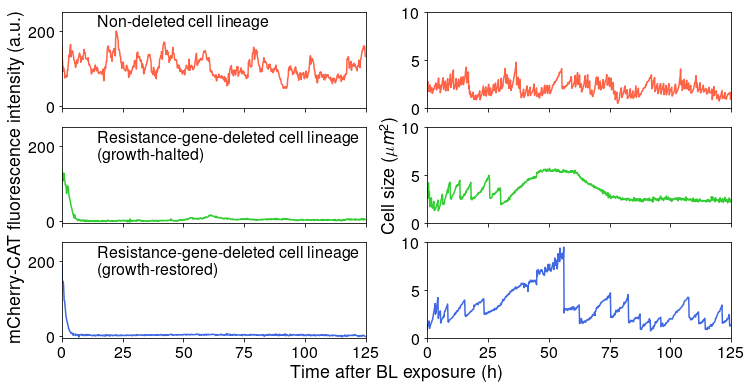

In [5]:
sample_list = [['2012'],['3402'],['1721']] ### Result IDs used in this figure
title_list = ['Resistance-gene-deleted cell lineage \n(growth-halted)', 'Resistance-gene-deleted cell lineage \n(growth-restored)', 'Non-deleted cell lineage']
color_list = ['limegreen', 'royalblue', 'tomato']

fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize = (12,6), sharex = True,sharey = 'col')
for num,i in enumerate([2,0,1]):
    for k in sample_list[i]:
        res_test = Result_gen[Result_gen.file == k]
        if k == '3402':
            res_test = res_test[res_test['Slice'] != 429] ### remove the data of the slice 429 because of high background.
        ax[num,0].plot(res_test.Time, res_test.TxRed, color = color_list[i])
        ax[num,1].plot(res_test.Time, res_test.Area2, color = color_list[i])
    ax[num,0].set_xlim(0,125)
    ax[num,0].set_ylim(-5,250)
    ax[num,1].set_xlim(0,125)
    ax[num,1].set_ylim(0,10)
    ax[num,0].text(15, 240, title_list[i], fontsize =16, va='top', ha='left')
ax[1,1].set_ylabel('Cell size ($\mu m^2$)', fontsize = 18)
ax[1,0].set_ylabel('mCherry-CAT fluorescence intensity (a.u.)', fontsize = 18)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Time after BL exposure (h)', fontsize = 18)
plt.show()

# save_path = main_path + '/figure' + path_list[-1] + '/Generation_time_per_generation_sample.pdf'
# plt.savefig(save_path, transparent = True, bbox_inches = 'tight')
# plt.cla